In [47]:
import pandas as pd
import numpy as np
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
excel_path = r"../../static/mock/AntiBio1.xlsx"

In [49]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df_compounds = tables_dict["TLantTest"]['dataframe']
df_bacterias = tables_dict["Table4"]['dataframe']
df_experiments = tables_dict["Table5"]['dataframe']


worksheet name: Table
tables in worksheet: 0

worksheet name: CompoundsData
tables in worksheet: 1
table name: TLantTest

worksheet name: BacteriasData
tables in worksheet: 1
table name: Table4

worksheet name: ExperimentsData
tables in worksheet: 1
table name: Table5

worksheet name: Legend-Main
tables in worksheet: 1
table name: T_Legend_main

worksheet name: Bac
tables in worksheet: 1
table name: T_Bacteria


In [50]:
df_experiments.head()

,REE,Bacteria,Salt/Solution,Stunting diameter
0,La,Staphylococcus aureus,0,25
1,Ce,Staphylococcus aureus,0,23
2,Pr,Staphylococcus aureus,0,22
3,Sm,Staphylococcus aureus,0,20
4,Eu,Staphylococcus aureus,0,22


In [51]:
df_compounds.head()

,REE,Ionic radii RE (salt),Electronegativity (Oganov),Crystal structure type (salt),Coordination number RE (salt),Coordination number RE (solution),рН (solution),Nitrate complexes stability constant (solution),Electronic structure RE3+,Price
0,La,1.03,2.49,1,11,11,4.44,0.8,600.430.520,138000
1,Ce,1.01,2.61,1,11,11,4.20,0.9,601.43,32790
2,Pr,0.99,2.24,2,10,10,4.51,0.9,602.43,98500
3,Sm,0.96,1.90,2,10,10,5.08,0.9,602.433,97000
4,Eu,0.95,1.81,2,10,10,5.56,0.8,602.434,134500


In [52]:
df_bacterias.head()

,Name,Gram-stain (bacteria),Wall thickness min (bacteria),Wall thickness max (bacteria),Wall structure (bacteria),Wall composition 1 (bacteria),Wall composition 2 (bacteria),Outer membrane (bacteria),Membrane pore diameter min (bacteria),Membrane pore diameter max (bacteria),Proteins (bacteria),Penicillin sensitivity (bacteria),Cell layers (bacteria)
0,Staphylococcus aureus,1,20,60,1,1,2,0,1,6,1,2,2
1,Escherichia coli,-1,14,18,2,0,1,1,1,15,2,1,1
2,Pseudomonas aeruginosa,-1,14,18,2,0,1,1,1,15,2,1,1
3,Klebsiella pneumoniae,-1,14,18,2,0,1,1,1,15,2,1,1


Let's drop names of compounds and bacteria. Also, we will drop price information because it doesn't affect the target variable. For now, we will drop electronic structure and lgβ because we should make some efforts to interpret them for the model. Membrane pore diameter min is also not interesting for us because it has the same value for all bacteria

In [53]:
df.columns

Index(['Is salt', 'Stunting diameter', 'Ionic radii RE (salt)',
       'Electronegativity (Oganov)', 'Crystal structure type (salt)',
       'Coordination number RE (salt)', 'Coordination number RE (solution)',
       'рН (solution)', 'Gram-stain (bacteria)',
       'Wall thickness min (bacteria)', 'Wall thickness max (bacteria)',
       'Wall structure (bacteria)', 'Wall composition 1 (bacteria)',
       'Wall composition 2 (bacteria)', 'Outer membrane (bacteria)',
       'Membrane pore diameter min (bacteria)',
       'Membrane pore diameter max (bacteria)', 'Proteins (bacteria)',
       'Penicillin sensitivity (bacteria)', 'Cell layers (bacteria)'],
      dtype='object')

In [54]:
df = df_experiments.merge(df_compounds, left_on='REE', right_on='REE').merge(df_bacterias, left_on='Bacteria', right_on='Name')
df = df.drop(['REE', 'Bacteria', 'Price', 'Name', 'Electronic structure RE3+', 'Nitrate complexes stability constant (solution)'], axis=1)
df.head()

,Salt/Solution,Stunting diameter,Ionic radii RE (salt),Electronegativity (Oganov),Crystal structure type (salt),Coordination number RE (salt),Coordination number RE (solution),рН (solution),Gram-stain (bacteria),Wall thickness min (bacteria),Wall thickness max (bacteria),Wall structure (bacteria),Wall composition 1 (bacteria),Wall composition 2 (bacteria),Outer membrane (bacteria),Membrane pore diameter min (bacteria),Membrane pore diameter max (bacteria),Proteins (bacteria),Penicillin sensitivity (bacteria),Cell layers (bacteria)
0,0,25,1.03,2.49,1,11,11,4.44,1,20,60,1,1,2,0,1,6,1,2,2
1,1,38,1.03,2.49,1,11,11,4.44,1,20,60,1,1,2,0,1,6,1,2,2
2,0,23,1.01,2.61,1,11,11,4.20,1,20,60,1,1,2,0,1,6,1,2,2
3,1,40,1.01,2.61,1,11,11,4.20,1,20,60,1,1,2,0,1,6,1,2,2
4,0,22,0.99,2.24,2,10,10,4.51,1,20,60,1,1,2,0,1,6,1,2,2


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salt/Solution,99.0,0.515152,0.502314,0.00,0.000,1.00,1.00,1.00
Stunting diameter,99.0,29.505051,10.562133,0.00,21.000,27.00,40.00,50.00
Ionic radii RE (salt),99.0,0.924949,0.068383,0.75,0.885,0.92,0.99,1.03
Electronegativity (Oganov),99.0,2.226263,0.277292,1.78,2.020,2.24,2.49,2.68
Crystal structure type (salt),99.0,3.252525,1.955335,1.00,2.000,2.00,4.50,7.00
Coordination number RE (salt),99.0,9.373737,1.411222,6.00,9.000,10.00,10.00,11.00
Coordination number RE (solution),99.0,9.373737,1.411222,6.00,9.000,10.00,10.00,11.00
рН (solution),99.0,4.814040,1.203583,1.87,4.440,5.16,5.63,5.96
Gram-stain (bacteria),99.0,-0.373737,0.932255,-1.00,-1.000,-1.00,1.00,1.00
Wall thickness min (bacteria),99.0,15.878788,2.796765,14.00,14.000,14.00,20.00,20.00


In [56]:
df.dtypes

Salt/Solution                              int64
Stunting diameter                          int64
Ionic radii RE (salt)                    float64
Electronegativity (Oganov)               float64
Crystal structure type (salt)              int64
Coordination number RE (salt)              int64
Coordination number RE (solution)          int64
рН (solution)                            float64
Gram-stain (bacteria)                      int64
Wall thickness min (bacteria)              int64
Wall thickness max (bacteria)              int64
Wall structure (bacteria)                  int64
Wall composition 1 (bacteria)              int64
Wall composition 2 (bacteria)              int64
Outer membrane (bacteria)                  int64
Membrane pore diameter min (bacteria)      int64
Membrane pore diameter max (bacteria)      int64
Proteins (bacteria)                        int64
Penicillin sensitivity (bacteria)          int64
Cell layers (bacteria)                     int64
dtype: object

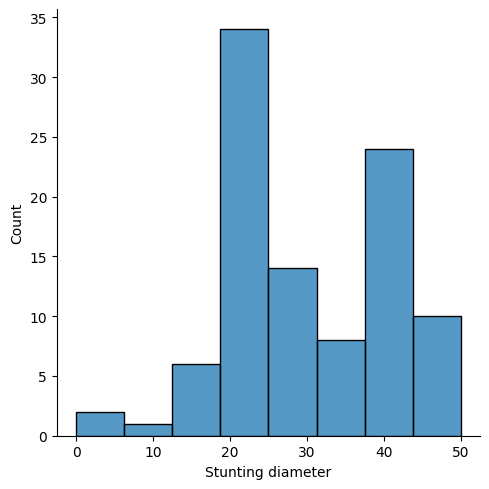

In [57]:
sns.displot(df['Stunting diameter'])

In [58]:
from sklearn.model_selection import train_test_split

X = df.drop('Stunting diameter', axis=1)
y = df['Stunting diameter']


In [59]:
%pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 

In [61]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]


In [85]:
def draw_importance(importances, model_name, columns=X.columns):
    features = {}
    color1 = "#2D466D"
    color2 = "#A2B0C5"
    for i, feature in enumerate(columns):
        features[f"f{i+1}"] = feature

    indices = np.argsort(importances)[::-1]
    num_to_plot = len(columns)
    feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

    print("Feature ranking:")
    for f in range(num_to_plot):
        print(
            "%d. %s %f "
            % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
        )
    plt.figure(figsize=(25, 12))
    bars = plt.bar(
        range(num_to_plot),
        importances[indices[:num_to_plot]],
        color=get_color_gradient(color1, color2, num_to_plot),
        align="center",
    )
    ax = plt.gca()
    plt.xticks(range(num_to_plot), range(1, num_to_plot + 1), fontsize=22)
    plt.yticks(fontsize=22)
    plt.xlim([-1, num_to_plot])
    plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices], fontsize="20");
    # plt.title(f"Feature importance in {model_name}")
    ax.set_xlabel("Feature rank", fontsize=22)
    ax.set_ylabel("Contribution to prediction", fontsize=22)
    plt.savefig(f'../mock/{model_name}.svg', format='svg', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)
    

# Model learning

## Mixed models

In [63]:
parameters = {
    'n_estimators': range(100, 1000, 50),
    'max_depth': [None] + list(range(3, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring=['neg_mean_absolute_error', 'r2', 'neg_mean_squared_error', 'explained_variance'],
    refit='neg_mean_absolute_error',
    n_jobs=-1)
clf.fit(X, y)
best_random_forest = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(clf.cv_results_['mean_test_r2'].max())
print(-clf.cv_results_['mean_test_neg_mean_squared_error'].max())
print(clf.cv_results_['mean_test_explained_variance'].max())

-4.403940993476034
{'max_depth': 3, 'n_estimators': 100}
0.38550869923664927
55.78301381946723
0.507488131496085


Feature ranking:
1. Salt/Solution 0.777727 
2. рН (solution) 0.073751 
3. Crystal structure type (salt) 0.044549 
4. Electronegativity (Oganov) 0.027526 
5. Coordination number RE (salt) 0.018678 
6. Ionic radii RE (salt) 0.014491 
7. Coordination number RE (solution) 0.009824 
8. Outer membrane (bacteria) 0.005217 
9. Penicillin sensitivity (bacteria) 0.004185 
10. Wall composition 2 (bacteria) 0.003841 
11. Wall structure (bacteria) 0.003311 
12. Wall composition 1 (bacteria) 0.003003 
13. Gram-stain (bacteria) 0.002766 
14. Membrane pore diameter max (bacteria) 0.002514 
15. Cell layers (bacteria) 0.002482 
16. Proteins (bacteria) 0.002206 
17. Wall thickness min (bacteria) 0.001990 
18. Wall thickness max (bacteria) 0.001941 
19. Membrane pore diameter min (bacteria) 0.000000 


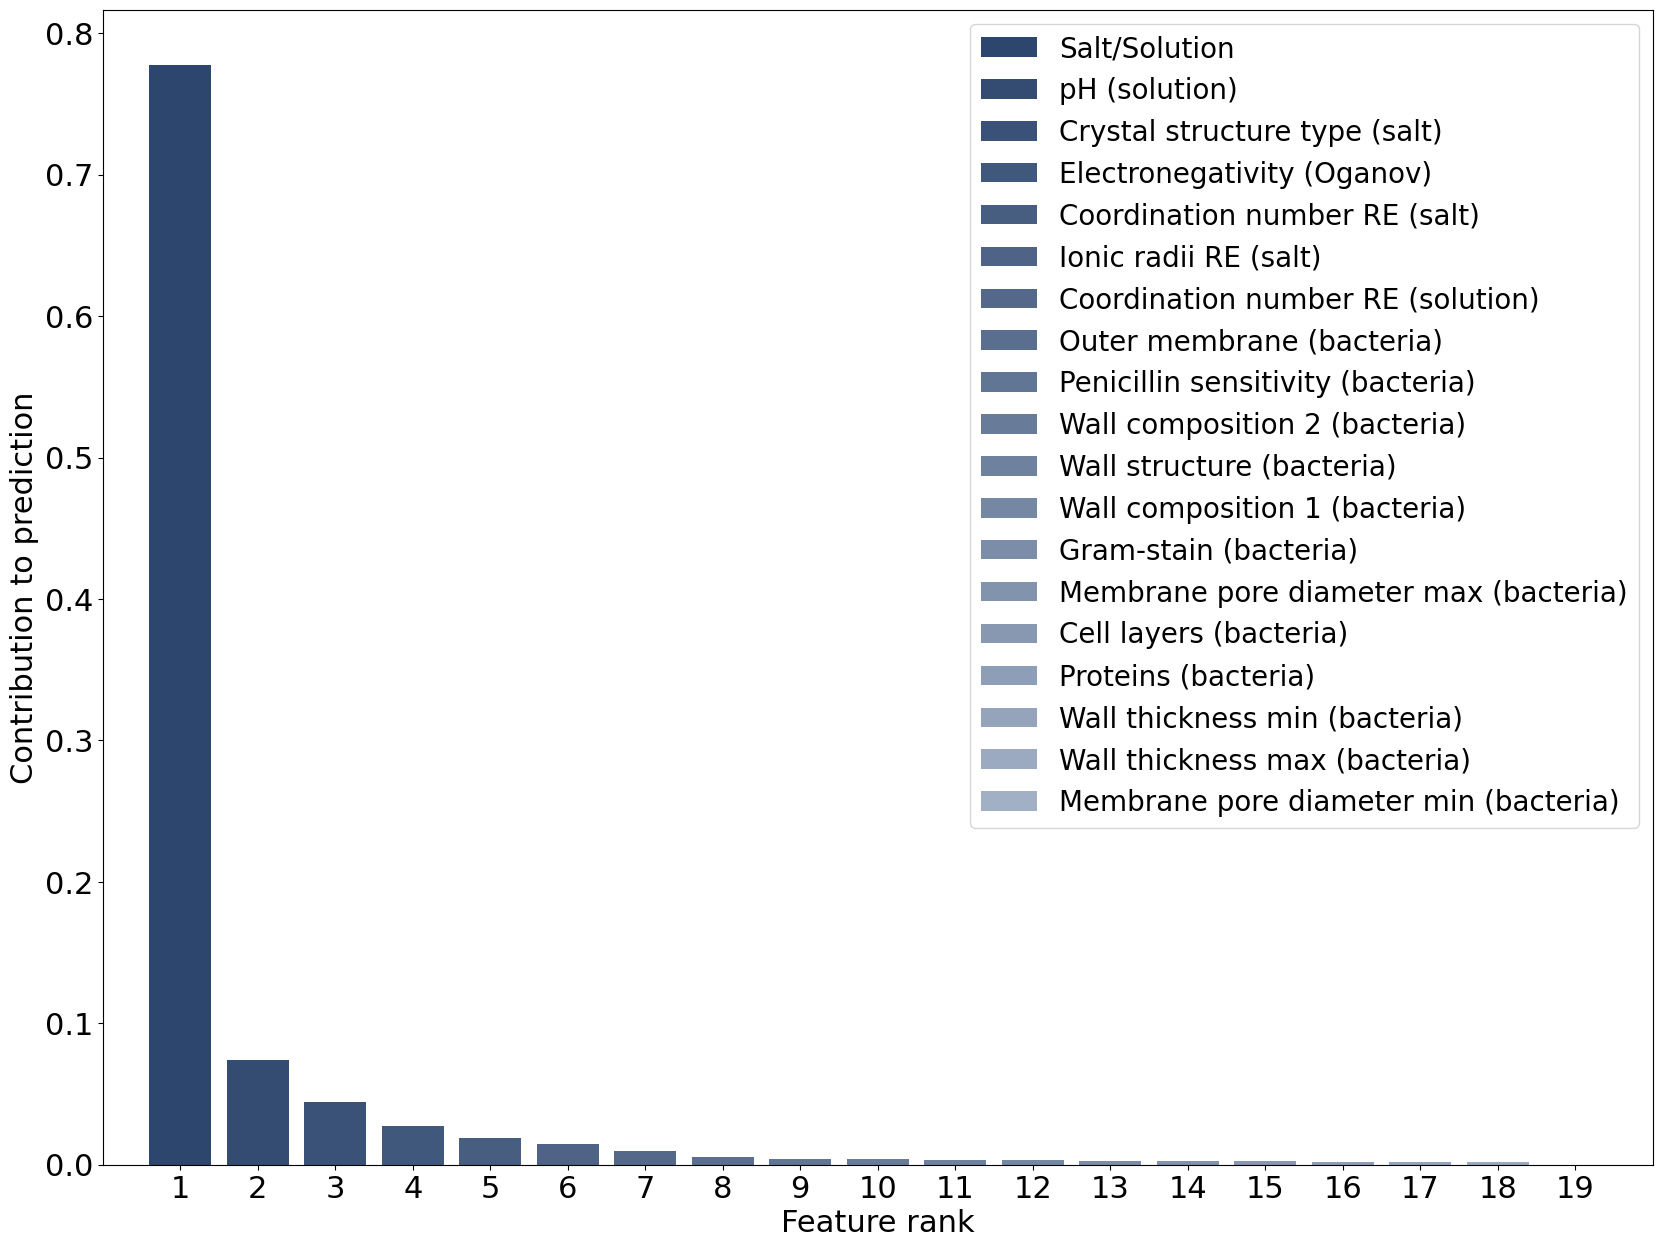

In [64]:
draw_importance(best_random_forest.feature_importances_, "Random forest")

In [65]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring=['neg_mean_absolute_error', 'r2', 'neg_mean_squared_error', 'explained_variance'],
    refit='neg_mean_absolute_error',
    n_jobs=-1)
clf.fit(X, y)
best_gradient_boost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(clf.cv_results_['mean_test_r2'].max())
print(-clf.cv_results_['mean_test_neg_mean_squared_error'].max())
print(clf.cv_results_['mean_test_explained_variance'].max())

-4.5221796208467016
{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 8}
0.49481431882532545
48.548738513851184
0.5954672084273988


Feature ranking:
1. Salt/Solution 0.900402 
2. рН (solution) 0.057571 
3. Crystal structure type (salt) 0.042027 
4. Wall thickness min (bacteria) 0.000000 
5. Ionic radii RE (salt) 0.000000 
6. Electronegativity (Oganov) 0.000000 
7. Coordination number RE (salt) 0.000000 
8. Coordination number RE (solution) 0.000000 
9. Gram-stain (bacteria) 0.000000 
10. Cell layers (bacteria) 0.000000 
11. Penicillin sensitivity (bacteria) 0.000000 
12. Wall structure (bacteria) 0.000000 
13. Wall composition 1 (bacteria) 0.000000 
14. Wall composition 2 (bacteria) 0.000000 
15. Outer membrane (bacteria) 0.000000 
16. Membrane pore diameter min (bacteria) 0.000000 
17. Membrane pore diameter max (bacteria) 0.000000 
18. Proteins (bacteria) 0.000000 
19. Wall thickness max (bacteria) 0.000000 


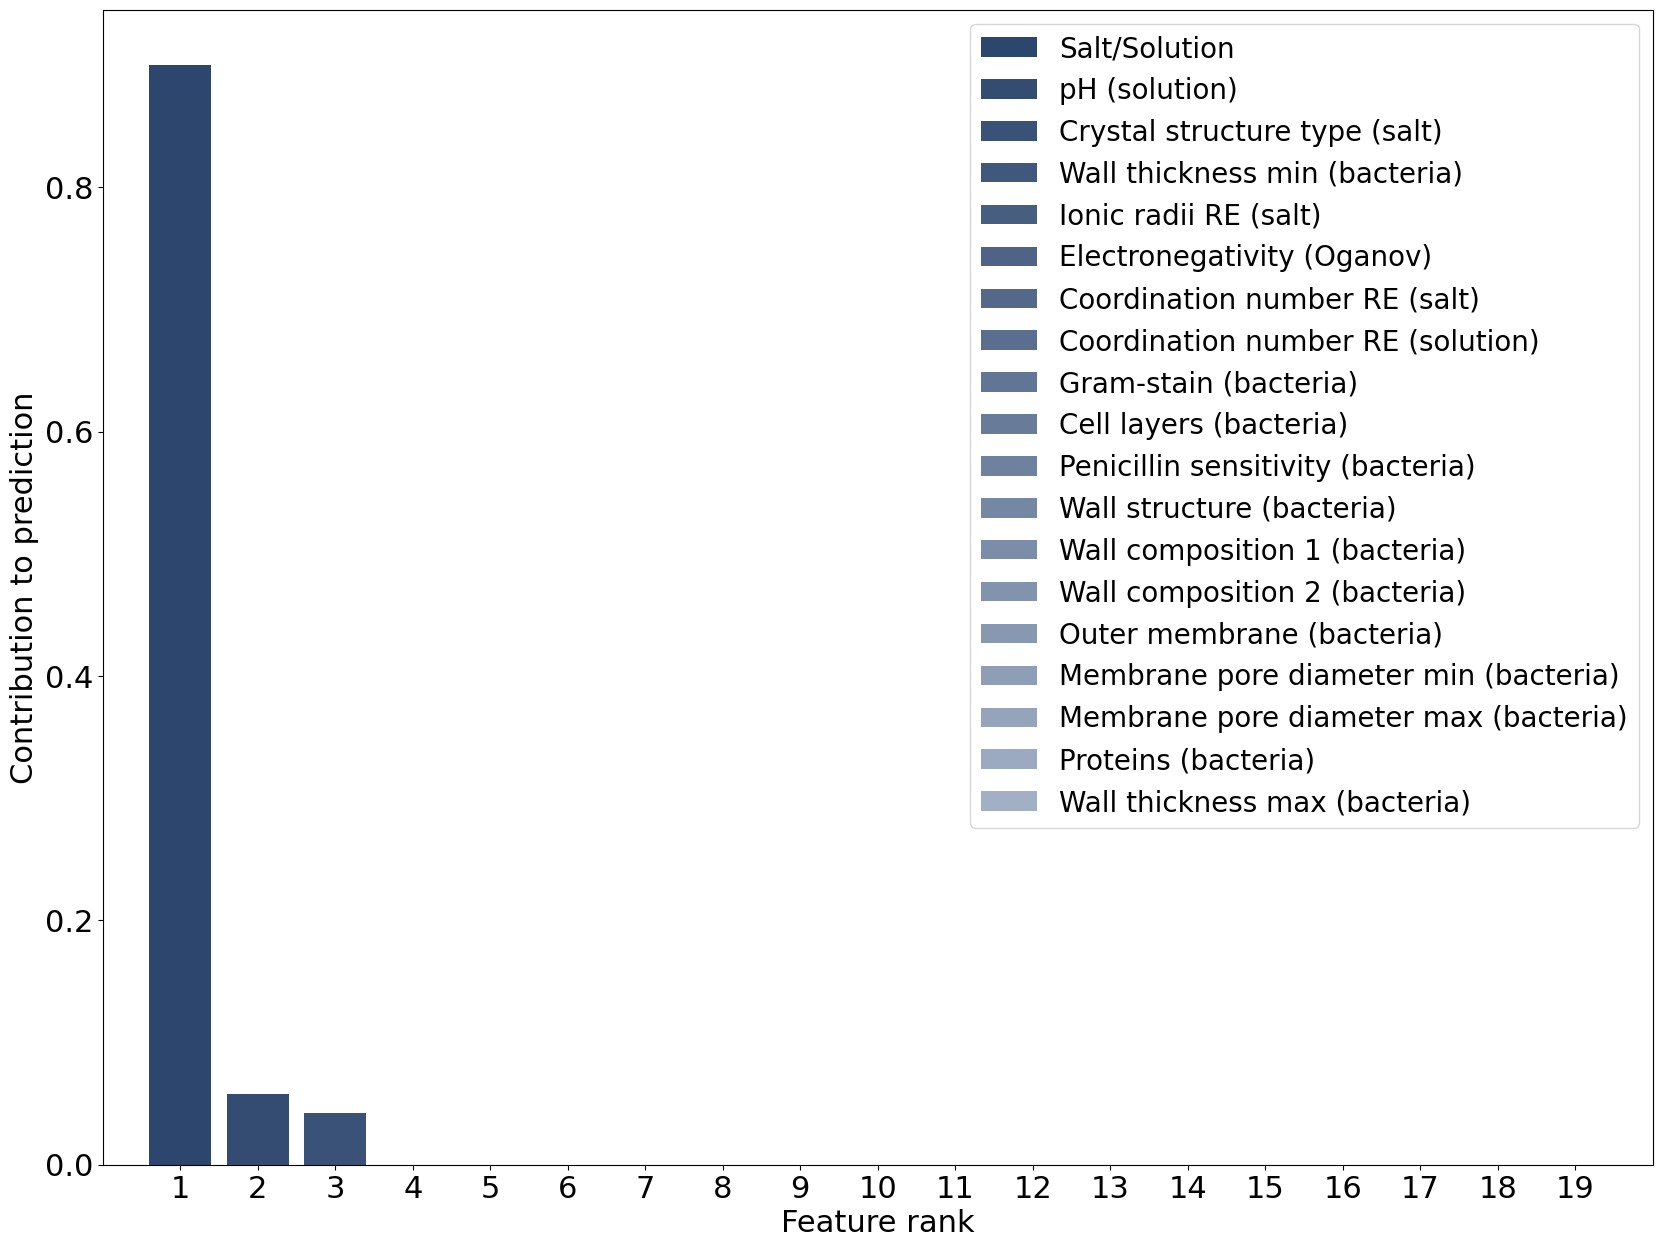

In [66]:
draw_importance(best_gradient_boost.feature_importances_, "Gradient boosting")

In [67]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15, 17, 18, 20],
    'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring=['neg_mean_absolute_error', 'r2', 'neg_mean_squared_error', 'explained_variance'],
    refit='neg_mean_absolute_error',
    n_jobs=-1)
clf.fit(X, y)
best_xgboost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(clf.cv_results_['mean_test_r2'].max())
print(-clf.cv_results_['mean_test_neg_mean_squared_error'].max())
print(clf.cv_results_['mean_test_explained_variance'].max())

-4.356599934226589
{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.4}
0.5123956714639633
46.50503297691523
0.5915220546380666


Feature ranking:
1. Salt/Solution 0.437057 
2. Crystal structure type (salt) 0.139123 
3. рН (solution) 0.121556 
4. Ionic radii RE (salt) 0.096463 
5. Gram-stain (bacteria) 0.085919 
6. Electronegativity (Oganov) 0.066936 
7. Coordination number RE (salt) 0.052945 
8. Wall thickness min (bacteria) 0.000000 
9. Coordination number RE (solution) 0.000000 
10. Cell layers (bacteria) 0.000000 
11. Penicillin sensitivity (bacteria) 0.000000 
12. Wall structure (bacteria) 0.000000 
13. Wall composition 1 (bacteria) 0.000000 
14. Wall composition 2 (bacteria) 0.000000 
15. Outer membrane (bacteria) 0.000000 
16. Membrane pore diameter min (bacteria) 0.000000 
17. Membrane pore diameter max (bacteria) 0.000000 
18. Proteins (bacteria) 0.000000 
19. Wall thickness max (bacteria) 0.000000 


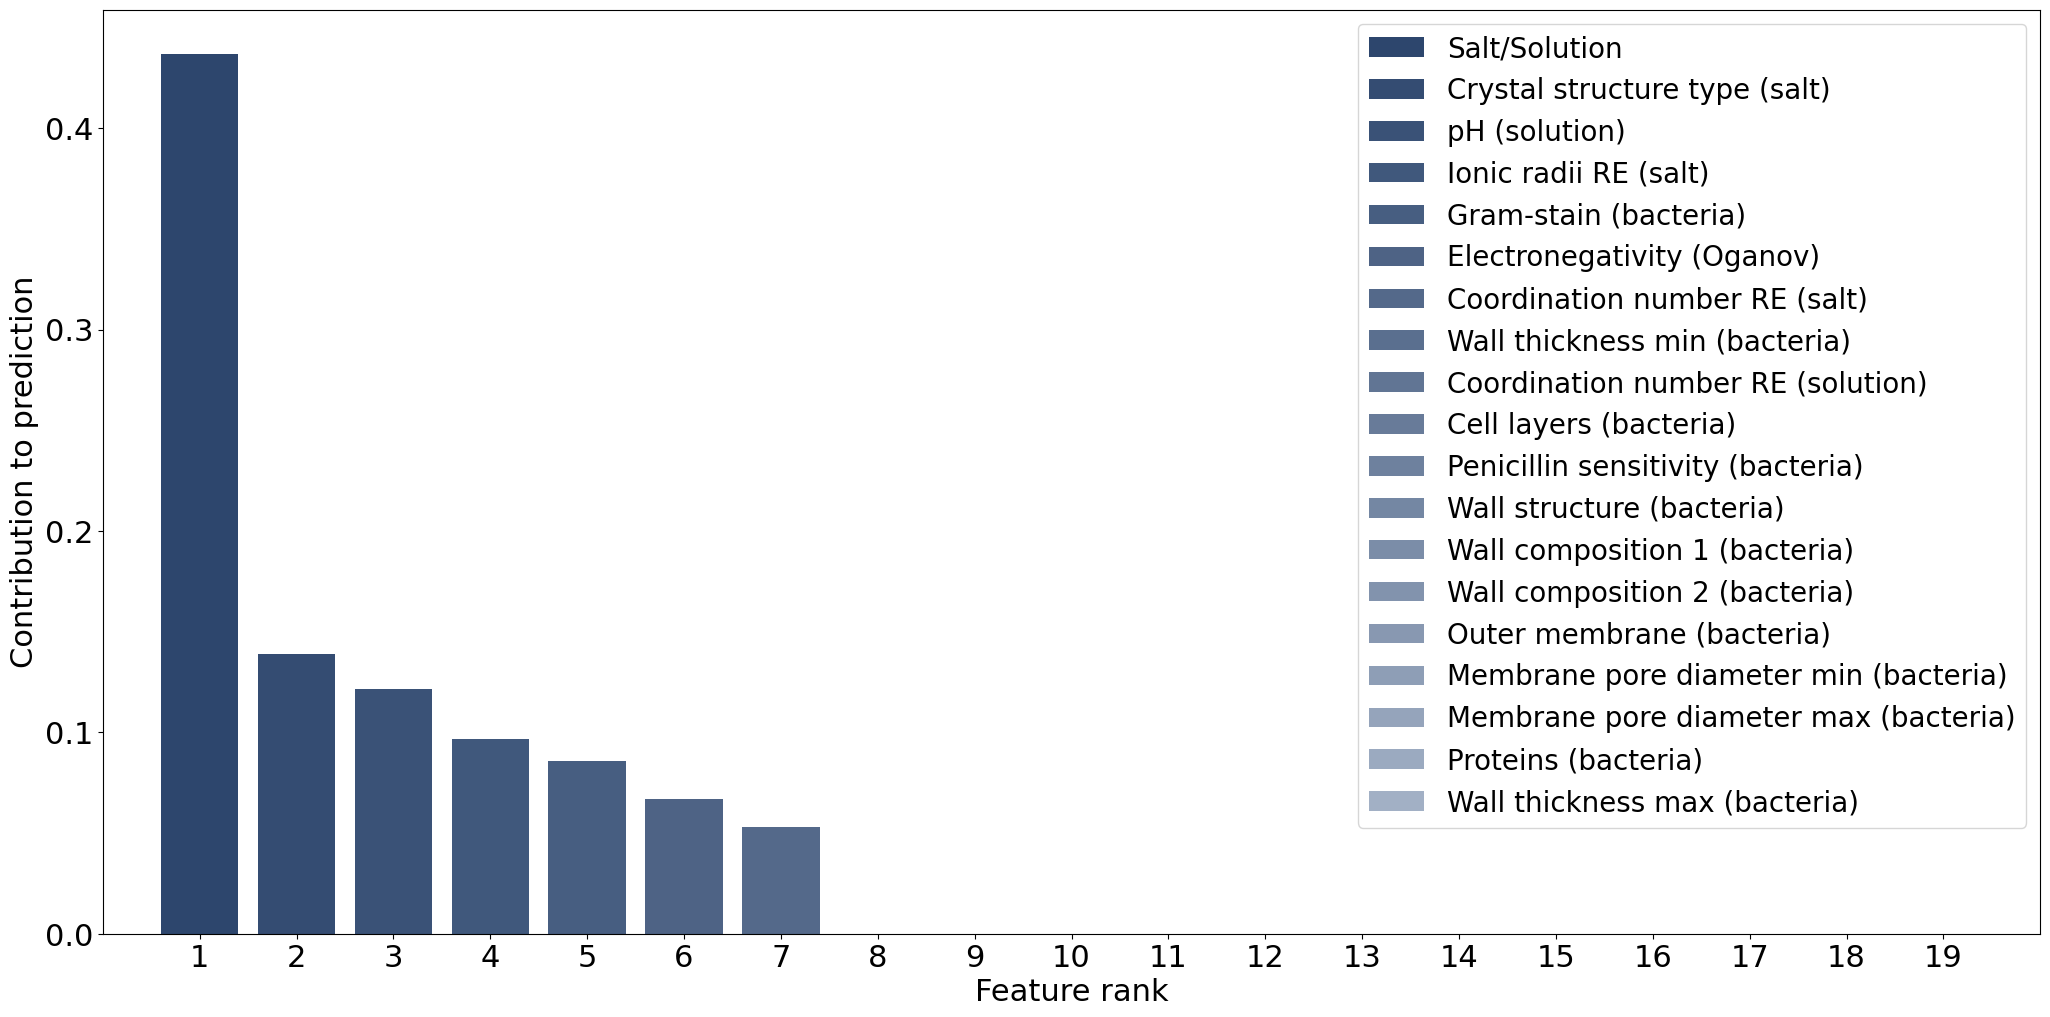

In [86]:
draw_importance(best_xgboost.feature_importances_, "XGboost")

### Сonclusion

We can see, that environment condition where compound take place hardly affect model, so let's split datasets and train to different models for salts and solution.

In [69]:
X_salts = X[X['Salt/Solution'] == 1].drop(['Coordination number RE (solution)', 'рН (solution)', 'Salt/Solution'], axis=1)
y_salts = y[X['Salt/Solution'] == 1]

X_solution = X[X['Salt/Solution'] == 0].drop(['Crystal structure type (salt)', 'Ionic radii RE (salt)', 'Coordination number RE (salt)', 'Salt/Solution'], axis=1)
y_solution = y[X['Salt/Solution'] == 0]

## Salts models

In [70]:
parameters = {
    'n_estimators': range(50, 1000, 50),
    'max_depth': [None] + list(range(1, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring=['neg_mean_absolute_error', 'r2', 'neg_mean_squared_error', 'explained_variance'],
    refit='r2',
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_random_forest_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(clf.cv_results_['mean_test_r2'].max())
print(-clf.cv_results_['mean_test_neg_mean_squared_error'].max())
print(clf.cv_results_['mean_test_explained_variance'].max())

0.07695552901243471
{'max_depth': 4, 'n_estimators': 900}
0.07695552901243471
38.96156521428075
0.2705146216117261


Feature ranking:
1. Electronegativity (Oganov) 0.243679 
2. Crystal structure type (salt) 0.224046 
3. Ionic radii RE (salt) 0.187241 
4. Coordination number RE (salt) 0.148405 
5. Gram-stain (bacteria) 0.019954 
6. Penicillin sensitivity (bacteria) 0.019385 
7. Proteins (bacteria) 0.018455 
8. Outer membrane (bacteria) 0.018432 
9. Wall thickness max (bacteria) 0.018073 
10. Wall structure (bacteria) 0.017993 
11. Wall composition 2 (bacteria) 0.017577 
12. Membrane pore diameter max (bacteria) 0.017361 
13. Wall thickness min (bacteria) 0.017075 
14. Wall composition 1 (bacteria) 0.016511 
15. Cell layers (bacteria) 0.015812 
16. Membrane pore diameter min (bacteria) 0.000000 


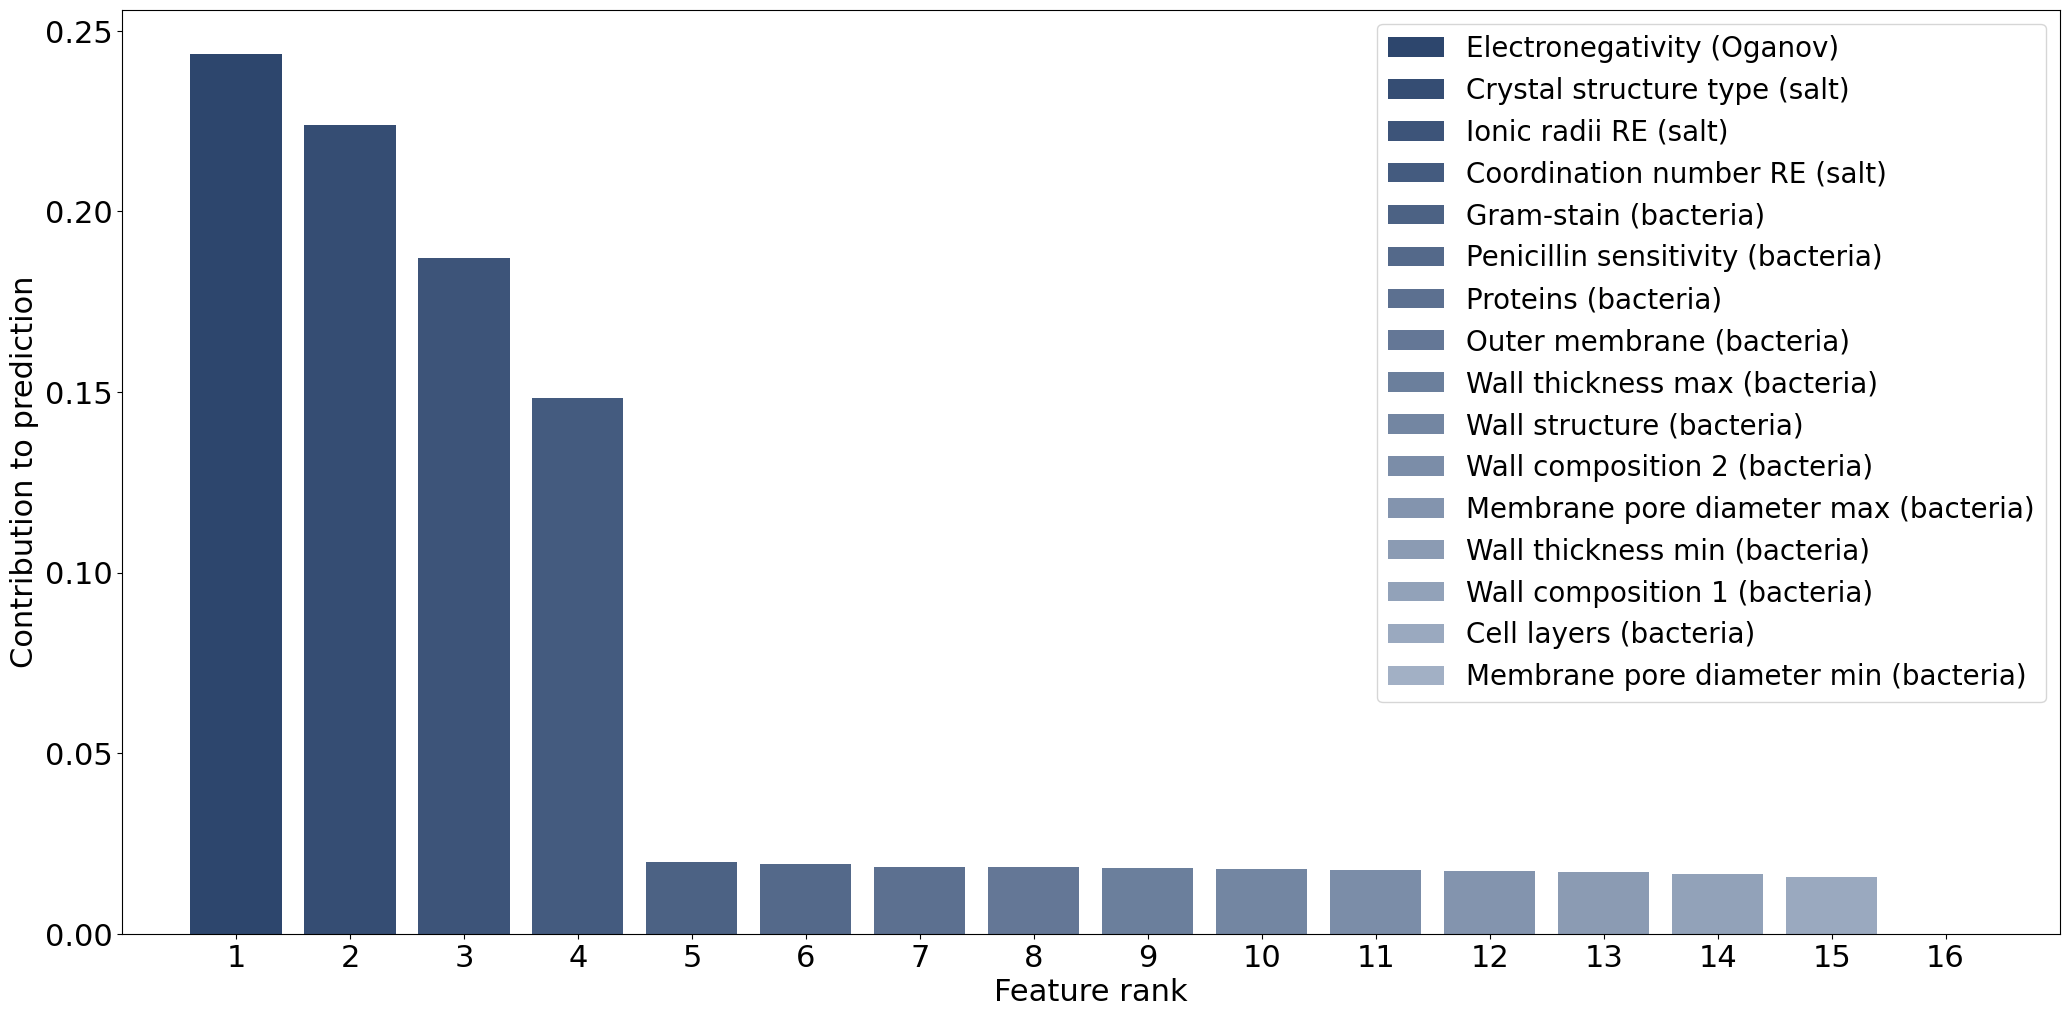

In [87]:
draw_importance(best_random_forest_salts.feature_importances_, "Random forest Salts", X_salts.columns)

In [72]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring=['neg_mean_absolute_error', 'r2', 'neg_mean_squared_error', 'explained_variance'],
    refit='neg_mean_absolute_error',
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_gradient_boost_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(clf.cv_results_['mean_test_r2'].max())
print(-clf.cv_results_['mean_test_neg_mean_squared_error'].max())
print(clf.cv_results_['mean_test_explained_variance'].max())

-4.823740105019465
{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 4}
0.03638330252213677
41.600438632192756
0.34883075236752886


Feature ranking:
1. Electronegativity (Oganov) 0.457184 
2. Crystal structure type (salt) 0.209509 
3. Ionic radii RE (salt) 0.133193 
4. Penicillin sensitivity (bacteria) 0.072659 
5. Wall composition 1 (bacteria) 0.053822 
6. Coordination number RE (salt) 0.039932 
7. Gram-stain (bacteria) 0.018102 
8. Membrane pore diameter max (bacteria) 0.015598 
9. Cell layers (bacteria) 0.000000 
10. Proteins (bacteria) 0.000000 
11. Membrane pore diameter min (bacteria) 0.000000 
12. Outer membrane (bacteria) 0.000000 
13. Wall composition 2 (bacteria) 0.000000 
14. Wall structure (bacteria) 0.000000 
15. Wall thickness max (bacteria) 0.000000 
16. Wall thickness min (bacteria) 0.000000 


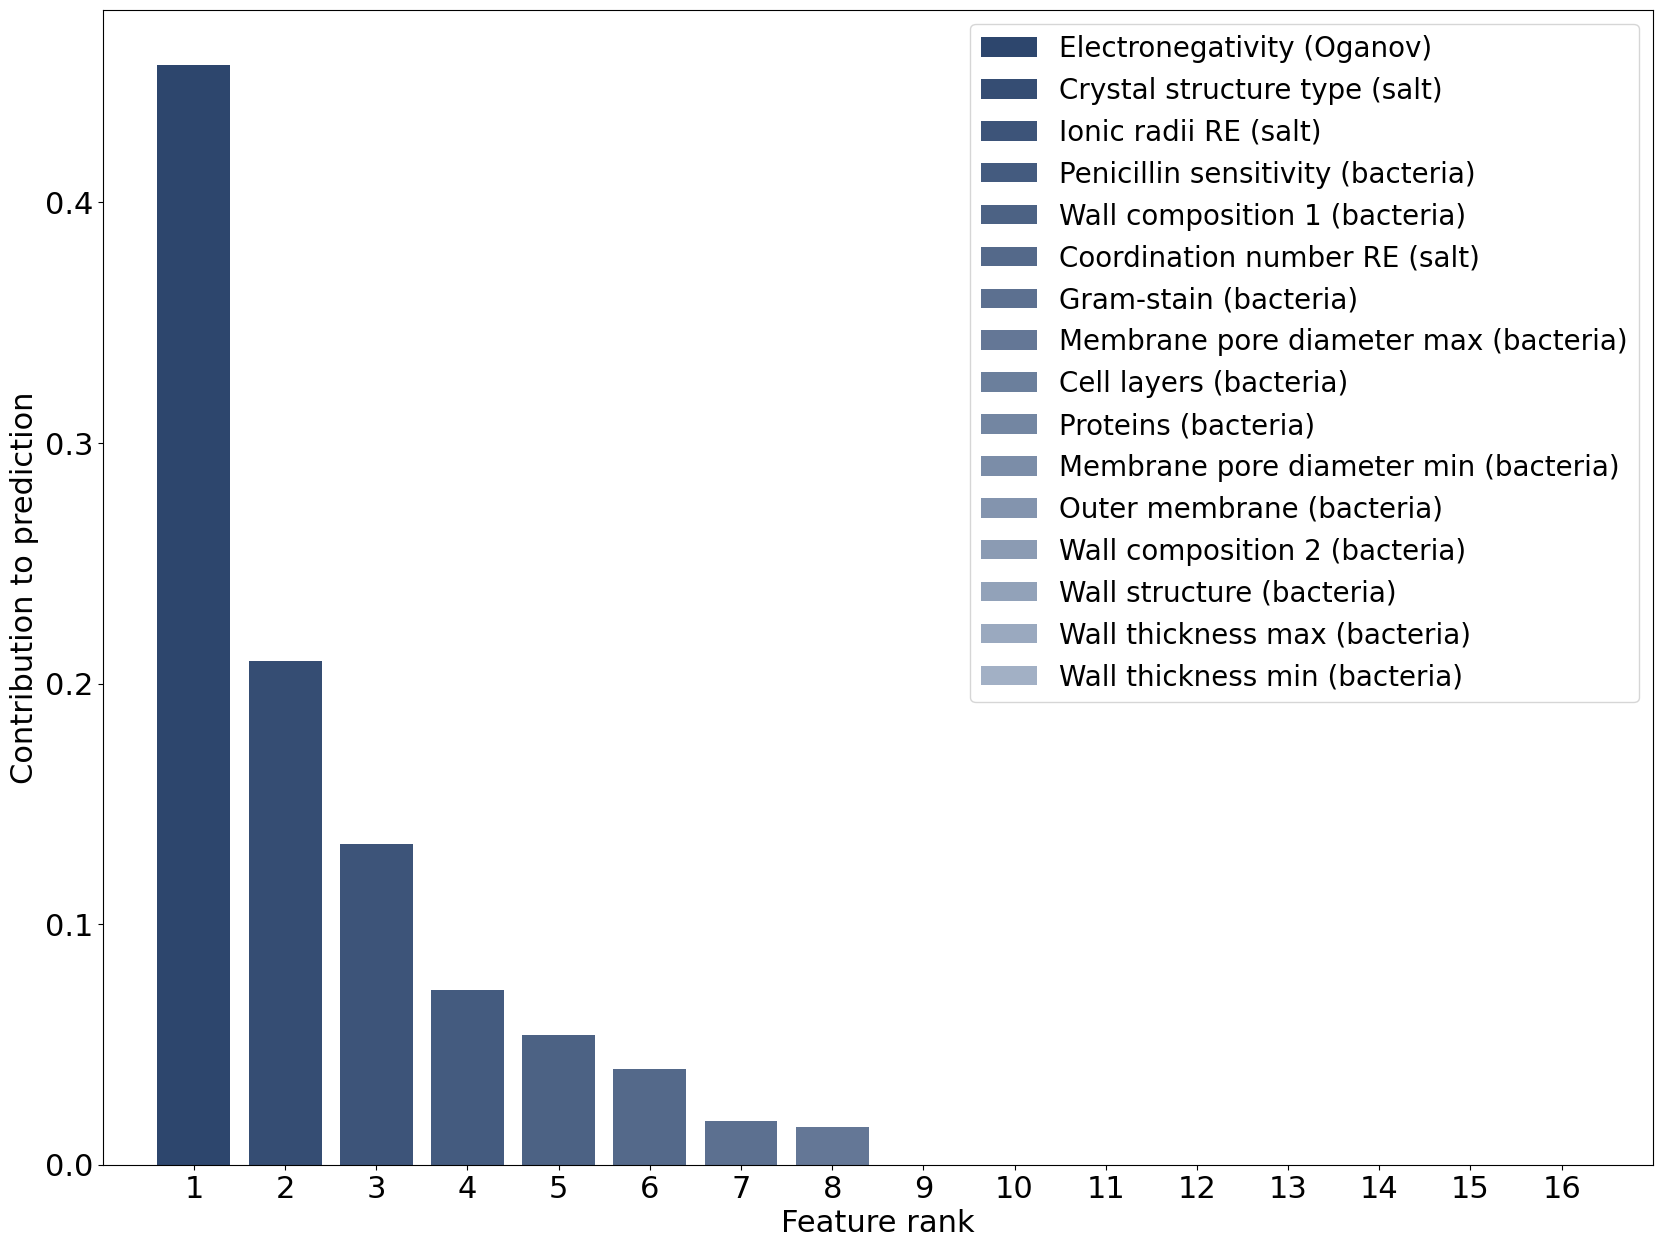

In [73]:
draw_importance(best_gradient_boost_salts.feature_importances_, "Gradient Boosting Salts", X_salts.columns)

In [74]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15,],
    'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring=['neg_mean_absolute_error', 'r2', 'neg_mean_squared_error', 'explained_variance'],
    refit='neg_mean_absolute_error',
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_xgboost_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(clf.cv_results_['mean_test_r2'].max())
print(-clf.cv_results_['mean_test_neg_mean_squared_error'].max())
print(clf.cv_results_['mean_test_explained_variance'].max())

-4.809820199446245
{'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}
0.07348948226442482
38.18155955487347
0.3229801032420557


Feature ranking:
1. Coordination number RE (salt) 0.280927 
2. Crystal structure type (salt) 0.205388 
3. Ionic radii RE (salt) 0.169838 
4. Electronegativity (Oganov) 0.168276 
5. Wall thickness min (bacteria) 0.072297 
6. Gram-stain (bacteria) 0.069163 
7. Wall thickness max (bacteria) 0.034111 
8. Cell layers (bacteria) 0.000000 
9. Penicillin sensitivity (bacteria) 0.000000 
10. Proteins (bacteria) 0.000000 
11. Membrane pore diameter max (bacteria) 0.000000 
12. Membrane pore diameter min (bacteria) 0.000000 
13. Outer membrane (bacteria) 0.000000 
14. Wall composition 2 (bacteria) 0.000000 
15. Wall composition 1 (bacteria) 0.000000 
16. Wall structure (bacteria) 0.000000 


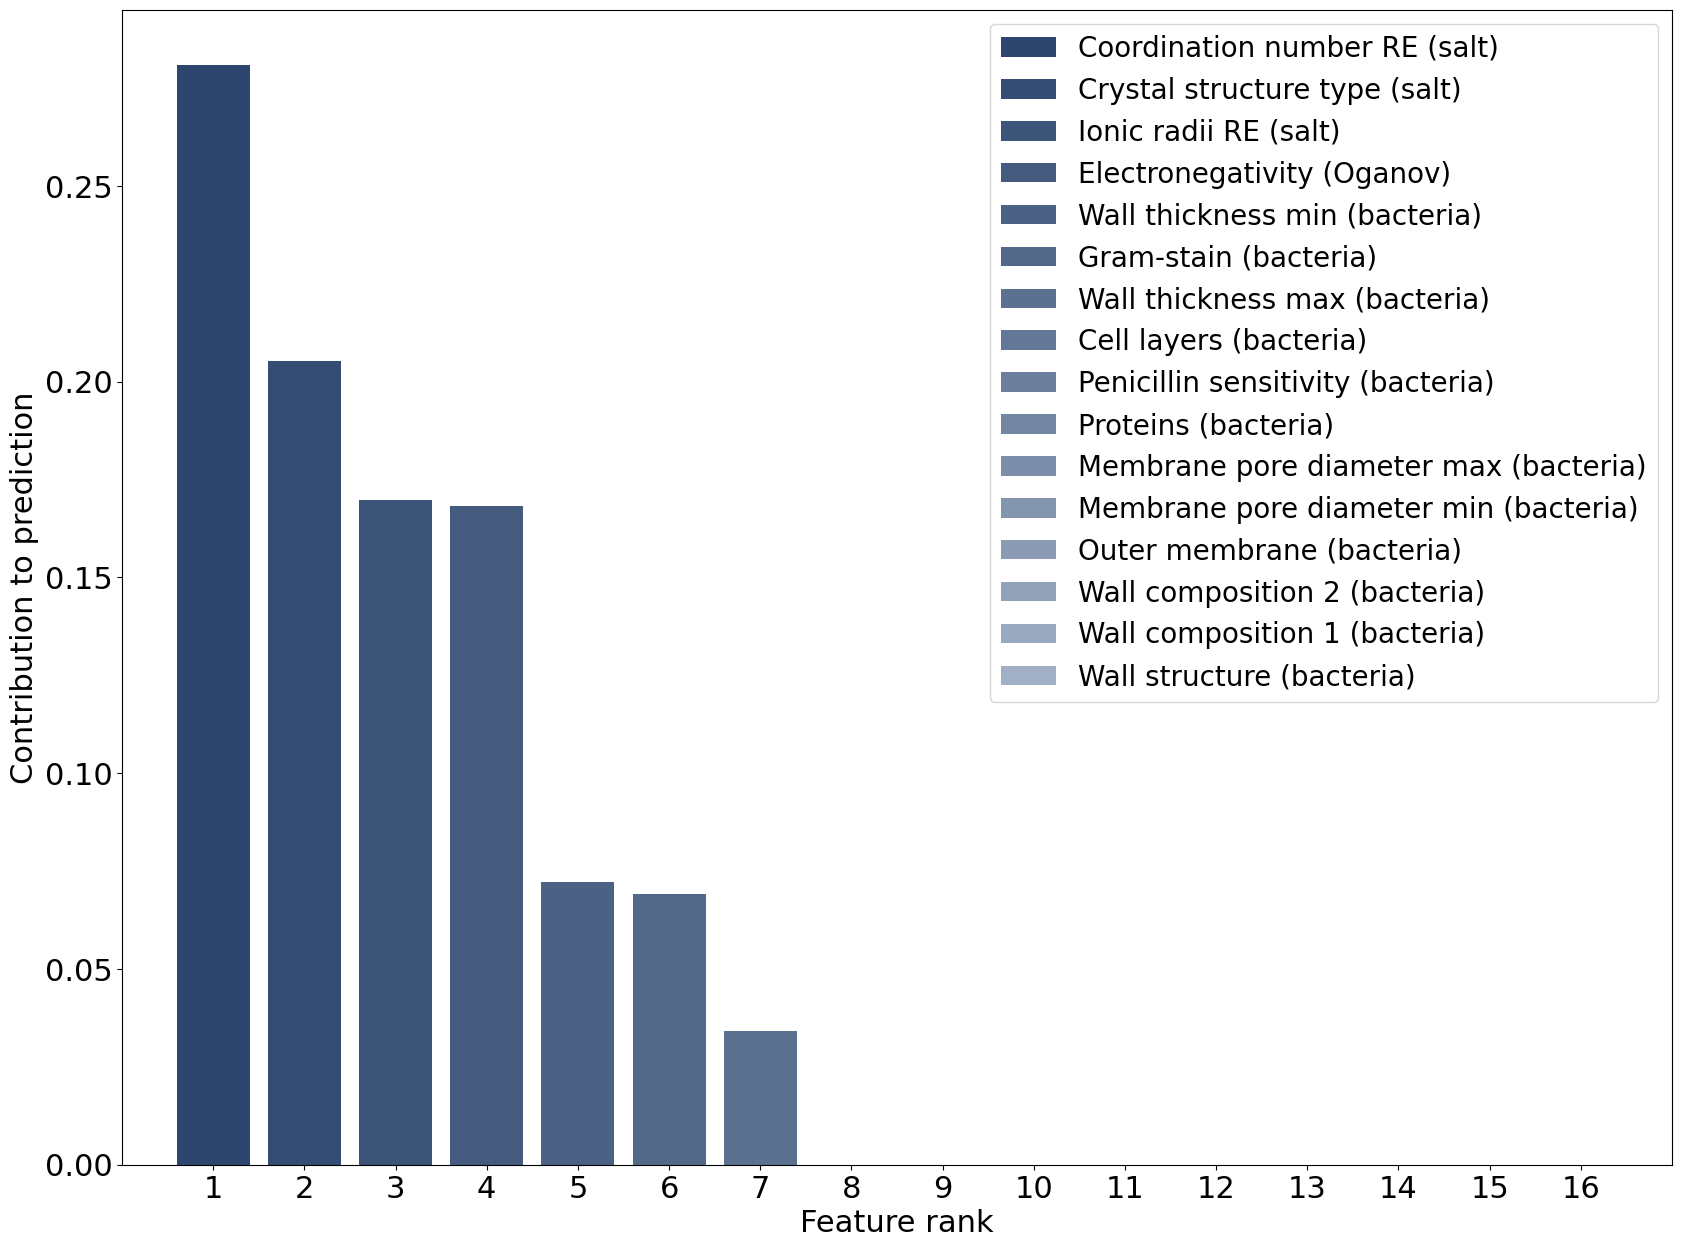

In [75]:
draw_importance(best_xgboost_salts.feature_importances_, "XGBoost_Salts", X_salts.columns)

## Solution models

In [76]:
parameters = {
    'n_estimators': range(50, 1000, 50),
    'max_depth': [None] + list(range(1, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring=['neg_mean_absolute_error', 'r2', 'neg_mean_squared_error', 'explained_variance'],
    refit='neg_mean_absolute_error',
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_random_forest_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(clf.cv_results_['mean_test_r2'].max())
print(-clf.cv_results_['mean_test_neg_mean_squared_error'].max())
print(clf.cv_results_['mean_test_explained_variance'].max())

-3.9454989816007178
{'max_depth': 1, 'n_estimators': 250}
-0.9893160732575744
58.36380074756729
-0.12354047247625848


Feature ranking:
1. Coordination number RE (solution) 0.452000 
2. Electronegativity (Oganov) 0.304000 
3. рН (solution) 0.148000 
4. Gram-stain (bacteria) 0.028000 
5. Proteins (bacteria) 0.012000 
6. Outer membrane (bacteria) 0.012000 
7. Wall thickness min (bacteria) 0.012000 
8. Membrane pore diameter max (bacteria) 0.008000 
9. Wall composition 1 (bacteria) 0.008000 
10. Wall structure (bacteria) 0.008000 
11. Cell layers (bacteria) 0.004000 
12. Wall thickness max (bacteria) 0.004000 
13. Penicillin sensitivity (bacteria) 0.000000 
14. Membrane pore diameter min (bacteria) 0.000000 
15. Wall composition 2 (bacteria) 0.000000 


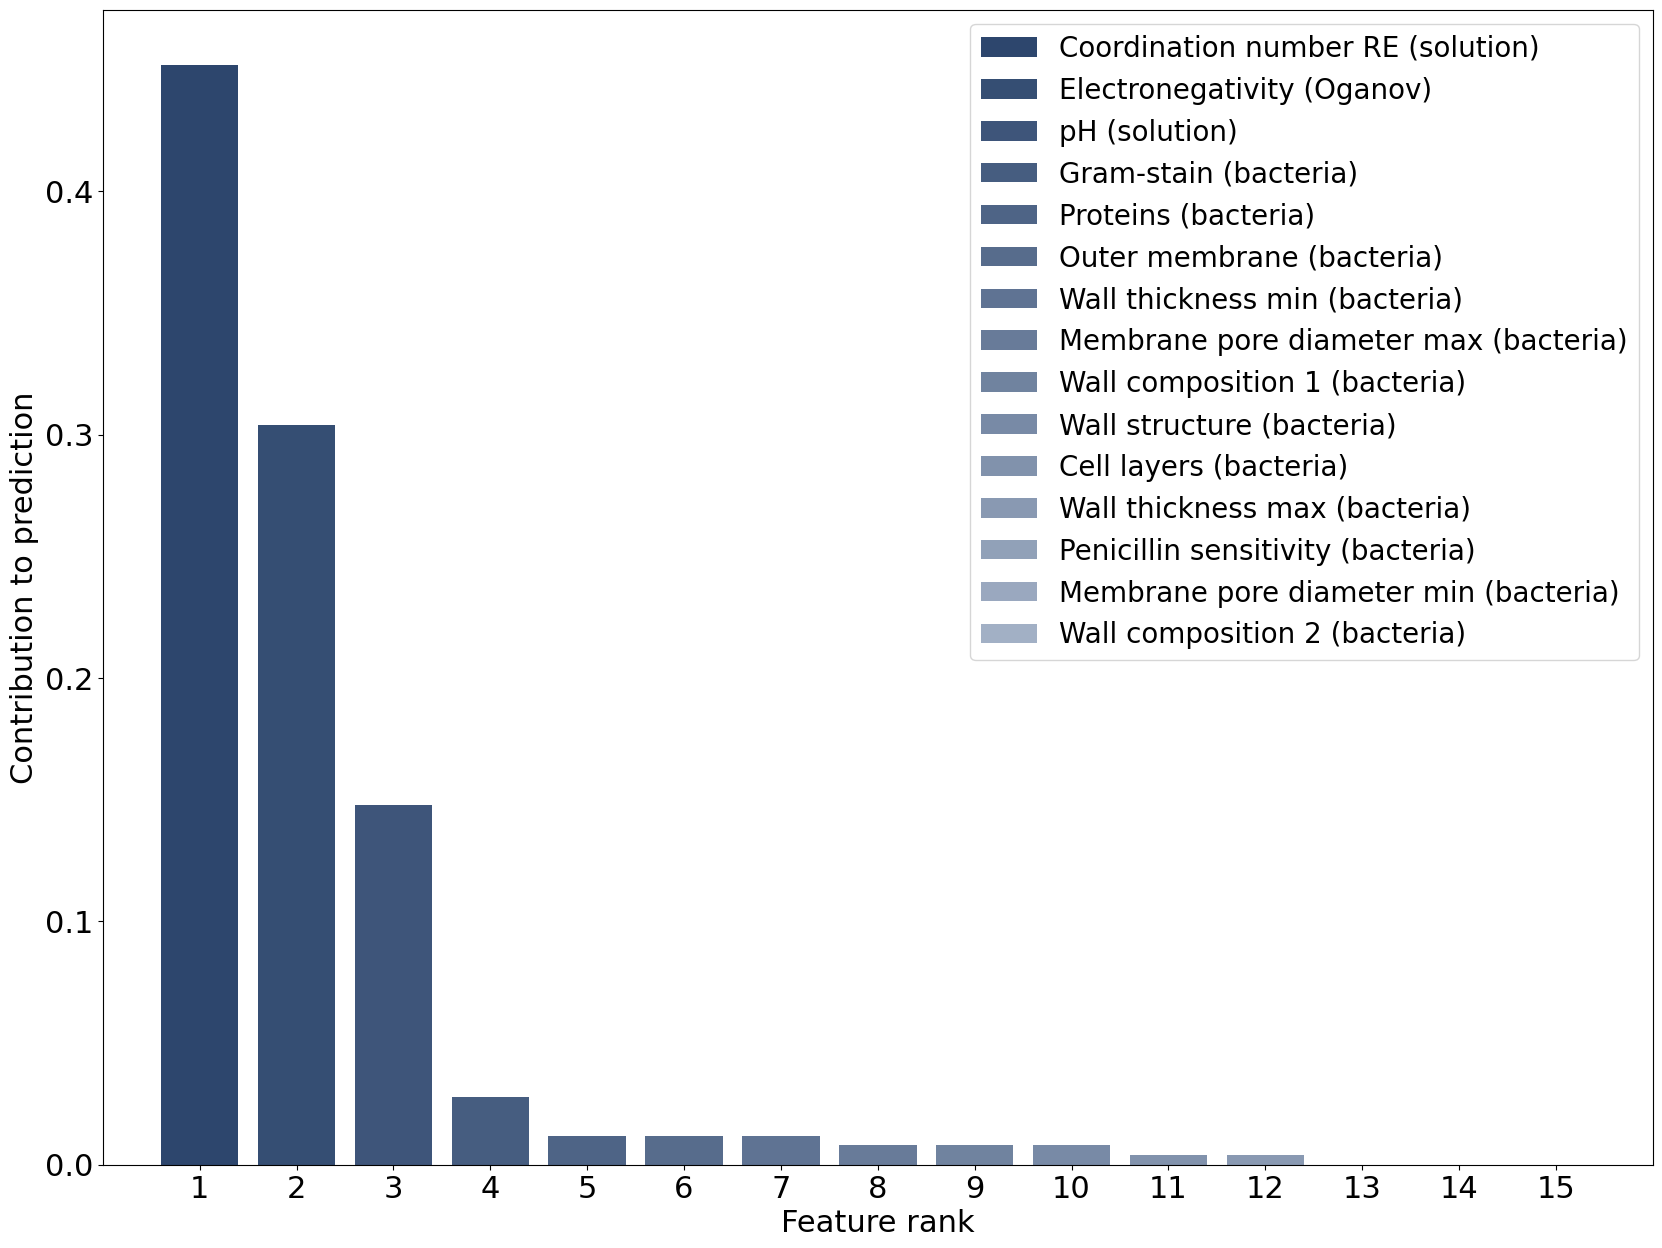

In [77]:
draw_importance(best_random_forest_solution.feature_importances_, "Random Forest Solution", X_solution.columns)

In [78]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring=['neg_mean_absolute_error', 'r2', 'neg_mean_squared_error', 'explained_variance'],
    refit='neg_mean_absolute_error',
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_gradient_boost_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(clf.cv_results_['mean_test_r2'].max())
print(-clf.cv_results_['mean_test_neg_mean_squared_error'].max())
print(clf.cv_results_['mean_test_explained_variance'].max())

-3.40472887803386
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 2}
-0.4639025596895355
41.580182291828706
0.06257171534040155


Feature ranking:
1. Electronegativity (Oganov) 1.000000 
2. Cell layers (bacteria) 0.000000 
3. Penicillin sensitivity (bacteria) 0.000000 
4. Proteins (bacteria) 0.000000 
5. Membrane pore diameter max (bacteria) 0.000000 
6. Membrane pore diameter min (bacteria) 0.000000 
7. Outer membrane (bacteria) 0.000000 
8. Wall composition 2 (bacteria) 0.000000 
9. Wall composition 1 (bacteria) 0.000000 
10. Wall structure (bacteria) 0.000000 
11. Wall thickness max (bacteria) 0.000000 
12. Wall thickness min (bacteria) 0.000000 
13. Gram-stain (bacteria) 0.000000 
14. рН (solution) 0.000000 
15. Coordination number RE (solution) 0.000000 


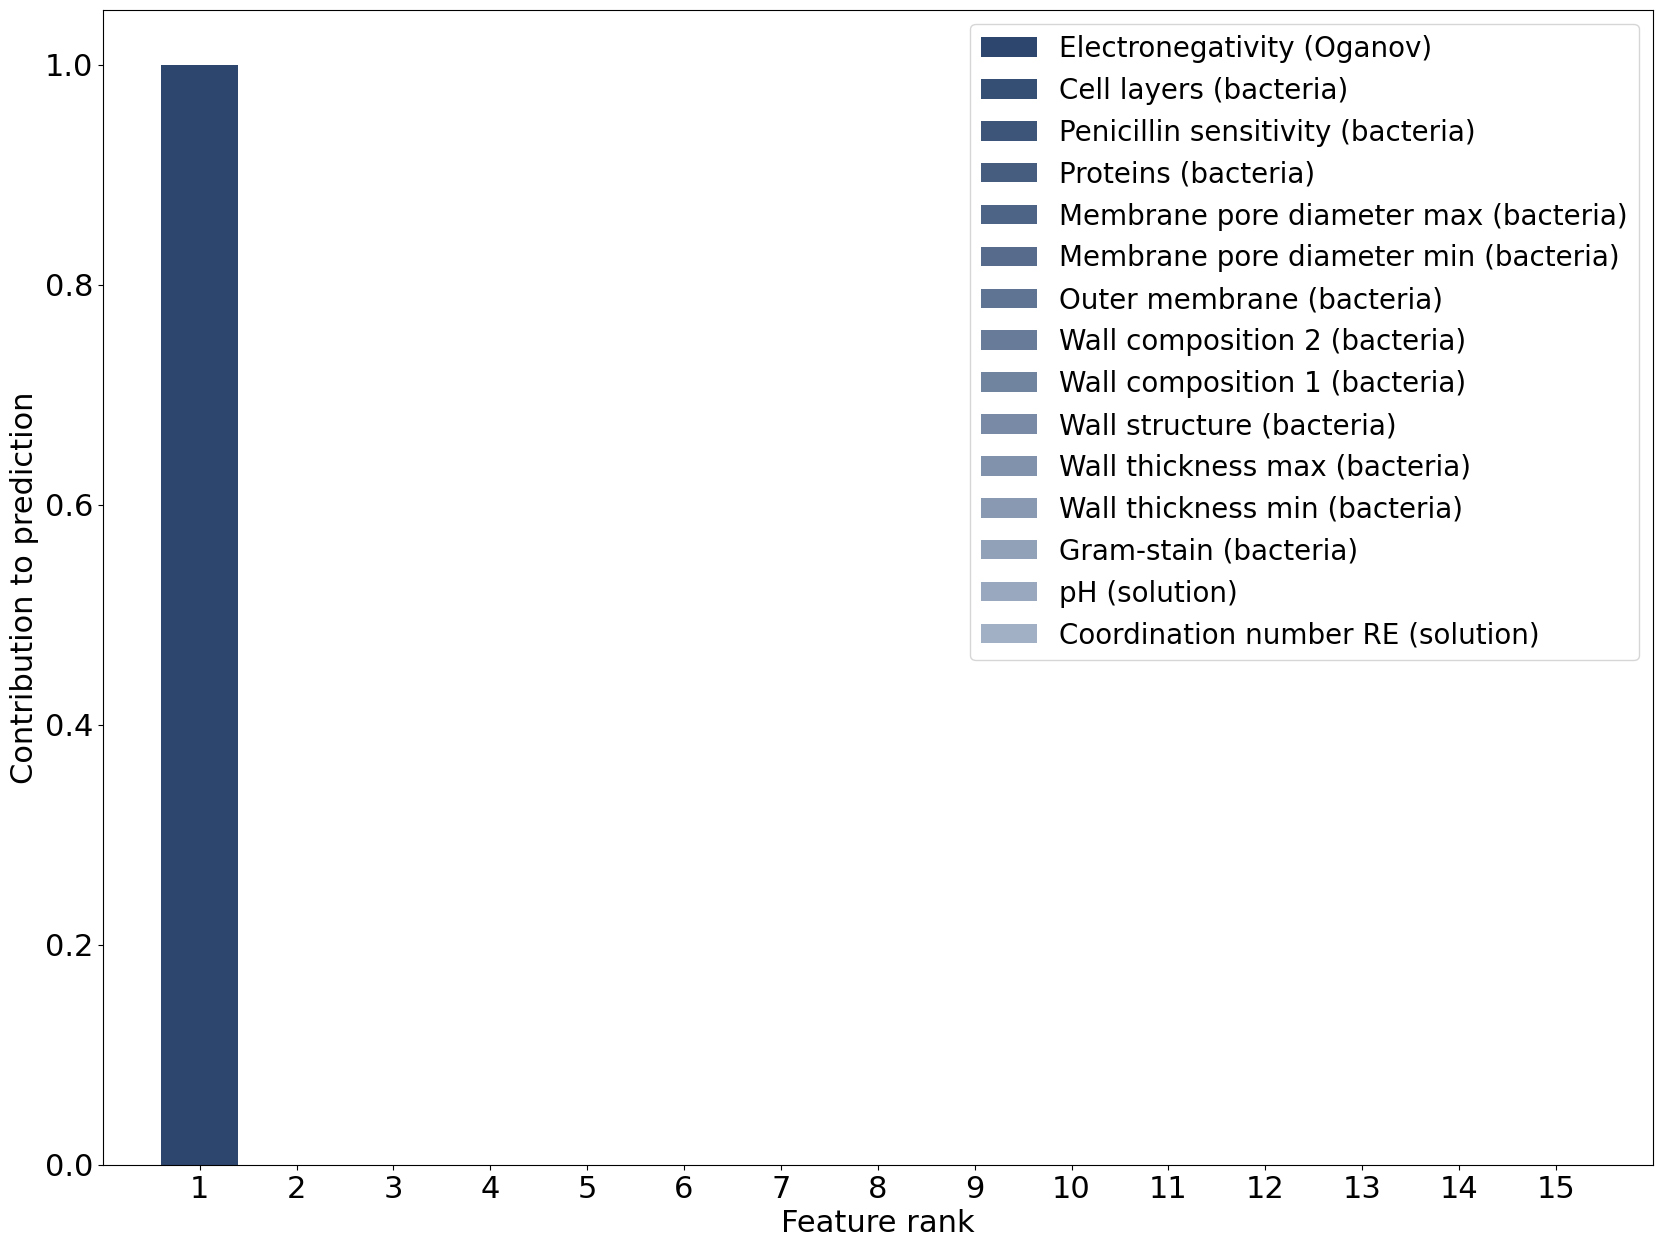

In [79]:
draw_importance(best_gradient_boost_solution.feature_importances_, "Gradient_Boosting_Solution", X_solution.columns)

In [80]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15, 17],
    'gamma': [0.6, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring=['neg_mean_absolute_error', 'r2', 'neg_mean_squared_error', 'explained_variance'],
    refit='neg_mean_absolute_error',
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_xgboost_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)
print(clf.cv_results_['mean_test_r2'].max())
print(-clf.cv_results_['mean_test_neg_mean_squared_error'].max())
print(clf.cv_results_['mean_test_explained_variance'].max())

-3.3880809699164494
{'colsample_bytree': 0.6, 'gamma': 0.6, 'max_depth': 3, 'min_child_weight': 17, 'subsample': 0.7}
-0.45511278967319485
40.7298989184211
0.06904313141128755


Feature ranking:
1. Electronegativity (Oganov) 0.364383 
2. Coordination number RE (solution) 0.348728 
3. рН (solution) 0.286890 
4. Cell layers (bacteria) 0.000000 
5. Penicillin sensitivity (bacteria) 0.000000 
6. Proteins (bacteria) 0.000000 
7. Membrane pore diameter max (bacteria) 0.000000 
8. Membrane pore diameter min (bacteria) 0.000000 
9. Outer membrane (bacteria) 0.000000 
10. Wall composition 2 (bacteria) 0.000000 
11. Wall composition 1 (bacteria) 0.000000 
12. Wall structure (bacteria) 0.000000 
13. Wall thickness max (bacteria) 0.000000 
14. Wall thickness min (bacteria) 0.000000 
15. Gram-stain (bacteria) 0.000000 


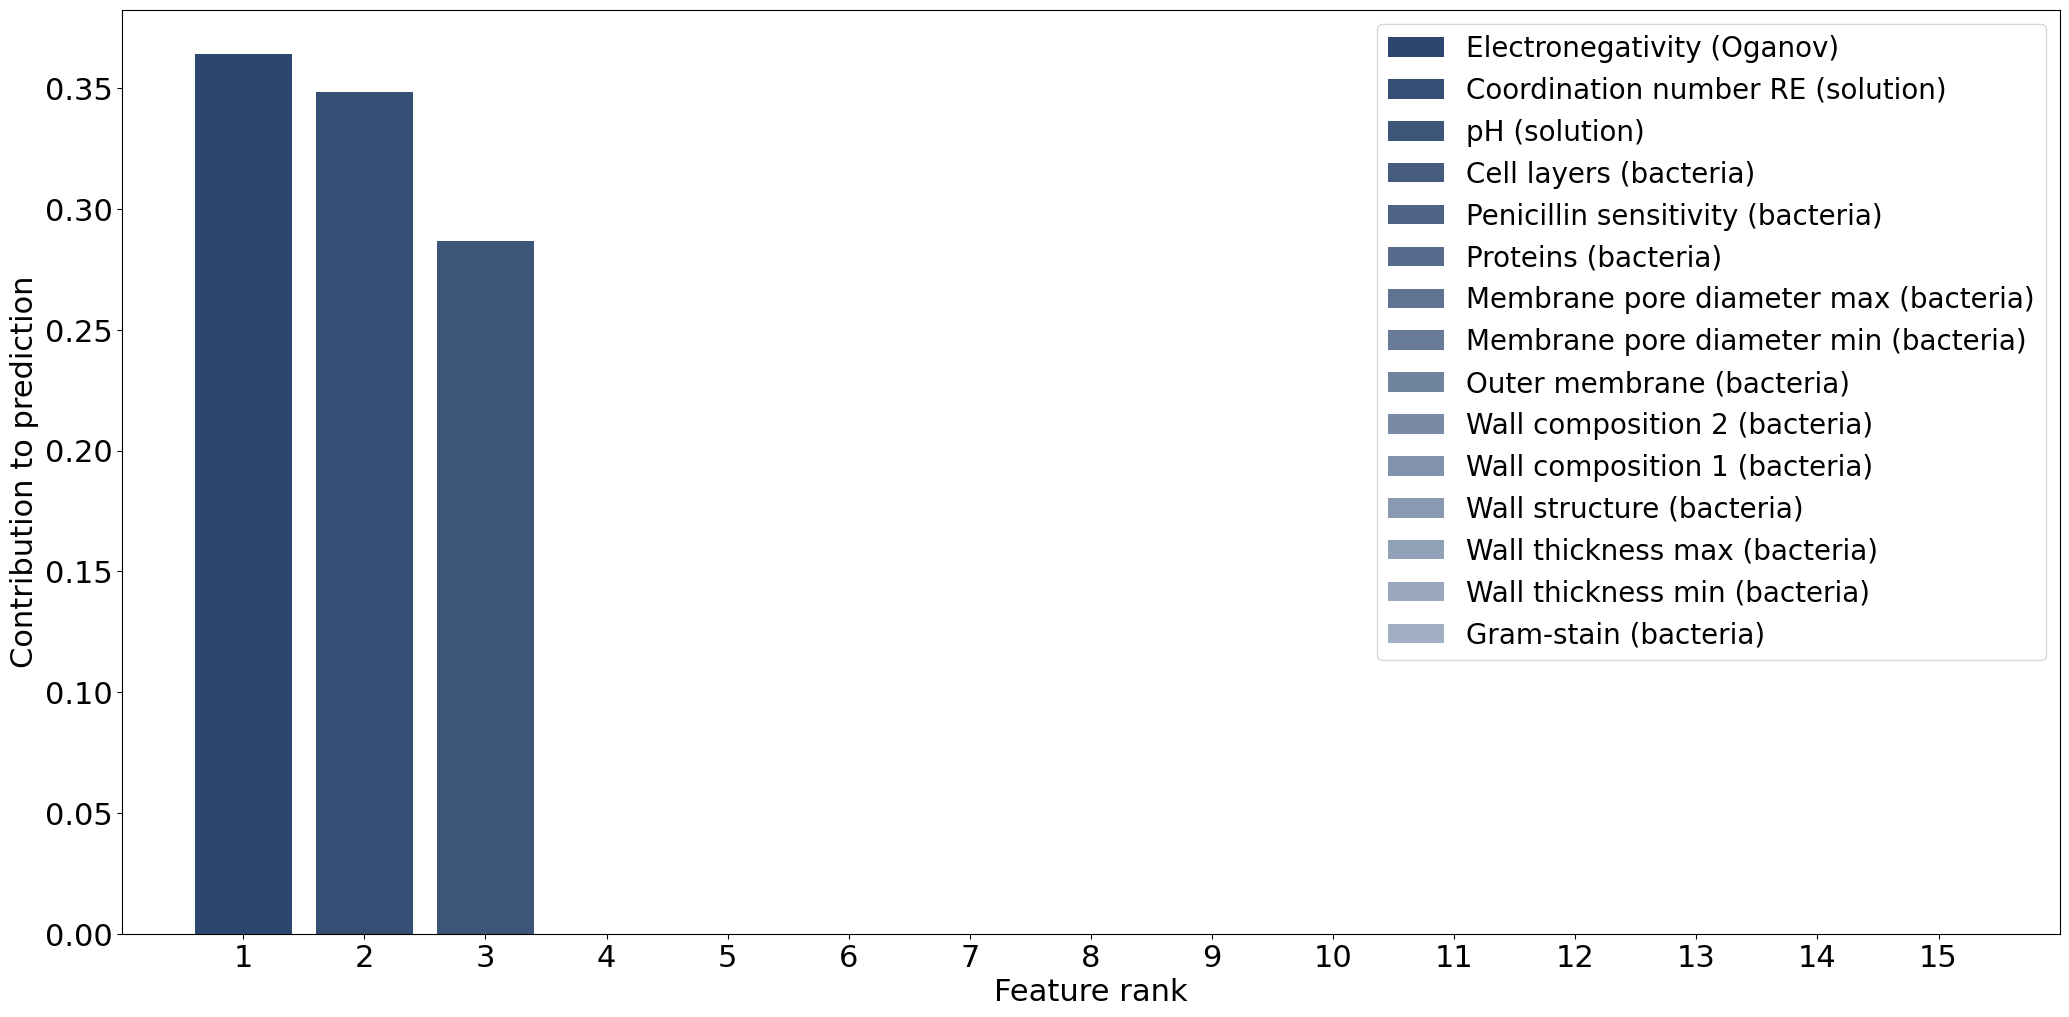

In [88]:
draw_importance(best_xgboost_solution.feature_importances_, "XGBoost Solution", X_solution.columns)

## Usefull diagrams

In [82]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn import tree
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split

# regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
# model = regr.fit(X, y)

# fig = plt.figure(figsize=(40,20))
# _ = tree.plot_tree(regr, feature_names=X.columns, filled=True, fontsize=21)
# plt.savefig(f'mock/DecisionTree.svg', format='svg', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)

In [83]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# corr = df.corr()
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Increase the size of the heatmap.
# plt.figure(figsize=(16, 6))
# # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
# heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12);
# plt.savefig(f'mock/Correlations.svg', format='svg', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)

In [84]:
df['Is salt'].replace({0: 'Solution', 1: 'Salt'}, inplace=True)
plt.figure(figsize=(15, 10))
sns.set(font_scale=2)
sns.histplot(data=df, x='Stunting diameter', hue='Salt/Solution', palette='mako')
plt.savefig(f'mock/Stunting diameter hist.svg', format='svg', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)

KeyError: 'Is salt'